In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
from time import time
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/tcc/pre-processed.csv')

# Transformando todas as letras em minúsculas
df['preprocessed_news'] = df['preprocessed_news'].str.lower()

# Pré Processamento

In [ ]:
# Cria um vetor de palavras para cada notícia
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df['preprocessed_news'])

# Aplica a técnica tf-idf para calcular a importância de cada palavra
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['label'], test_size=0.2, random_state=42)

class_names = ['Falso', 'Verdadeiro']

# Árvore de decisão

Treinamento do modelo em 15.740s
Predição do modelo em 0.045s

Precisão do modelo de Árvore de Decisão: 88.54167%

Relatório de Classificação:
              precision    recall  f1-score   support

       Falso       0.88      0.89      0.89       718
  Verdadeiro       0.89      0.89      0.89       722

    accuracy                           0.89      1440
   macro avg       0.89      0.89      0.89      1440
weighted avg       0.89      0.89      0.89      1440



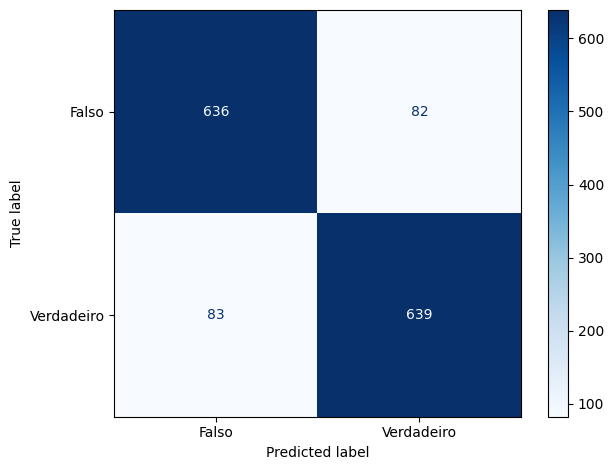

In [ ]:
# Modelo de Árvore de Decisão
tree_clf = DecisionTreeClassifier(random_state=42)

t0 = time()
tree_clf.fit(X_train, y_train)
t1 = time()

t2 = time()
y_pred_tree = tree_clf.predict(X_test)
t3 = time()

accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("Treinamento do modelo em %0.3fs" % (t1 - t0))
print("Predição do modelo em %0.3fs" % (t3 - t2))
print(f"\nPrecisão do modelo de Árvore de Decisão: {np.round(accuracy_tree*100, 5)}%\n")

class_report_tree = classification_report(y_test, y_pred_tree, target_names=class_names)
print(f"Relatório de Classificação:\n{class_report_tree}")

ConfusionMatrixDisplay.from_estimator(
    tree_clf, X_test, y_test, display_labels= class_names, xticks_rotation="horizontal", cmap="Blues"
)
plt.tight_layout()
plt.show()

# Random Forest

Treinamento do modelo em 18.250s
Predição do modelo em 0.589s

Precisão do modelo de Árvore de Decisão: 94.79167%

Relatório de Classificação:
              precision    recall  f1-score   support

       Falso       0.93      0.97      0.95       718
  Verdadeiro       0.97      0.93      0.95       722

    accuracy                           0.95      1440
   macro avg       0.95      0.95      0.95      1440
weighted avg       0.95      0.95      0.95      1440



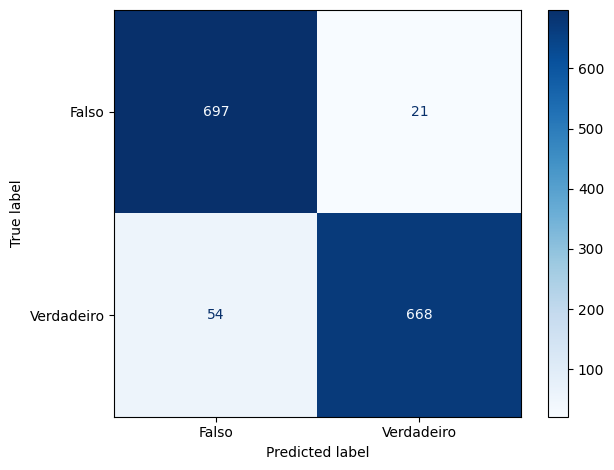

In [ ]:
# Modelo Random Forest
rnd_clf = RandomForestClassifier(random_state=42)

t0 = time()
rnd_clf.fit(X_train, y_train)
t1 = time()

t2 = time()
y_pred_rnd = rnd_clf.predict(X_test)
t3 = time()

accuracy_rnd = accuracy_score(y_test, y_pred_rnd)

print("Treinamento do modelo em %0.3fs" % (t1 - t0))
print("Predição do modelo em %0.3fs" % (t3 - t2))
print(f"\nPrecisão do modelo de Árvore de Decisão: {np.round(accuracy_rnd*100, 5)}%\n")

class_report_rnd = classification_report(y_test, y_pred_rnd, target_names=class_names)
print(f"Relatório de Classificação:\n{class_report_rnd}")

ConfusionMatrixDisplay.from_estimator(
    rnd_clf, X_test, y_test, display_labels=class_names, xticks_rotation="horizontal", cmap="Blues"
)
plt.tight_layout()
plt.show()

# KNeighbors

In [ ]:
# Modelo KNeighbors
knn_clf = KNeighborsClassifier(n_neighbors=42, n_jobs=-1)

t0 = time()
knn_clf.fit(X_train, y_train)
t1 = time()

t2 = time()
y_pred_knn = knn_clf.predict(X_test)
t3 = time()

accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Treinamento do modelo em %0.3fs" % (t1 - t0))
print("Predição do modelo em %0.3fs" % (t3 - t2))
print(f"\nPrecisão do modelo de Árvore de Decisão: {np.round(accuracy_knn*100, 5)}%\n")

class_report_knn = classification_report(y_test, y_pred_knn, target_names=class_names)
print(f"Relatório de Classificação:\n{class_report_knn}")

ConfusionMatrixDisplay.from_estimator(
    knn_clf, X_test, y_test, display_labels=class_names, xticks_rotation="horizontal", cmap="Blues"
)
plt.tight_layout()
plt.show()

Treinamento do modelo em 0.011s
Predição do modelo em 455.394s

Precisão do modelo de Árvore de Decisão: 66.18056%

Relatório de Classificação:
              precision    recall  f1-score   support

       Falso       0.91      0.36      0.51       718
  Verdadeiro       0.60      0.97      0.74       722

    accuracy                           0.66      1440
   macro avg       0.76      0.66      0.63      1440
weighted avg       0.76      0.66      0.63      1440



# Busca por Hiperparâmetros

# Árvore de Decisão
Randomized Search

In [ ]:
# Parâmetros para Randomized Search
param_dist_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(10, 20, 2),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

# Execução do Randomized Search para o modelo de árvore de decisão
random_search_tree = RandomizedSearchCV(tree_clf, param_dist_tree, cv=5, n_iter=10, n_jobs=-1)
t0 = time()
random_search_tree.fit(X_train, y_train)
t1 = time()

best_params_random = random_search_tree.best_params_
best_score_random = random_search_tree.best_score_

print("\nTreinamento do RandomizedSearch em %0.3fs\n" % (t1 - t0))
print(f"\nMelhores parâmetros para o modelo: {best_params_random} \nMelhor score: {best_score_random}")


Treinamento do RandomizedSearch em 148.143s


Melhores parâmetros para o modelo: {'min_samples_split': 6, 'min_samples_leaf': 7, 'max_depth': 10, 'criterion': 'gini'} 
Melhor score: 0.9069444444444444


# Random Forest
Randomized Search

In [ ]:
# Parâmetros para Randomized Search
param_dist_rnd = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(10, 20, 2),
    'min_samples_split': range(2, 10),
    'min_samples_leaf': range(1, 10)
}

# Execução do Randomized Search para o modelo de árvore de decisão
random_search_rnd = RandomizedSearchCV(rnd_clf, param_dist_rnd, cv=5, n_iter=10, n_jobs=-1)

t0 = time()
random_search_rnd.fit(X_train, y_train)
t1 = time()

best_params_random = random_search_rnd.best_params_
best_score_random = random_search_rnd.best_score_

print("\nTreinamento do RandomizedSearch em %0.3fs\n" % (t1 - t0))
print(f"\nMelhores parâmetros para o modelo: {best_params_random} \nMelhor score: {best_score_random}")


Treinamento do RandomizedSearch em 169.167s


Melhores parâmetros para o modelo: {'min_samples_split': 4, 'min_samples_leaf': 6, 'max_depth': 18, 'criterion': 'gini'} 
Melhor score: 0.9489583333333333


In [ ]:
import joblib
joblib.dump(rnd_clf, 'random_forest_model_news.pkl')